## Project Description: SVHN Digit Recognition

### Background:
The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications. The Street View House Numbers (SVHN) dataset is one of the most popular ones. It has been used in neural networks created by Google to read house numbers and match them to their geolocations. This is a great benchmark dataset to play with, learn and train models that accurately identify street numbers, and incorporate into all sorts of projects.

### Objective:
In this project we will use dataset with images centred around a single digit (many of the images do contain some distractors at the sides). Although we are taking a sample of the data which is simple, it is more complex than MNIST because the distractors. Given the dataset, our aim is to build a model that can identify house numbers in an image.

# New Section

In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

### 1. Mount your drive on Colab, store and read the dataset and split into train and test sets. – 10 marks

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# from google.colab import drive
# drive.mount ('/content/drive', force_remount=True)
# path = '/content/drive/MyDrive/Colab Notebooks/Data_001_ANN/'

# New Section

In [8]:
!ls '/content/drive/MyDrive/Colab Notebooks/Data_001_ANN/'

'Project Description - SVHN Digit Recognition v101.ipynb'   SVHN_single_grey.h5


In [9]:
# Import necessasry libraries.
# import cv2
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc, precision_recall_fscore_support
from sklearn.neighbors import KNeighborsClassifier


In [10]:
# Reading data from an hdf5 file, import h5py Library/Package
import h5py

In [11]:
# Open and read objects in the SVHN file

SVHN_file = h5py.File('/content/drive/MyDrive/Colab Notebooks/Data_001_ANN/SVHN_single_grey.h5', 'r')
# SVHN_file = h5py.File('/content/drive/MyDrive/Colab Notebooks/Data_001_ANN/SVHN_single_grey.h5', 'r')
ls = list(SVHN_file.keys())
SVHN_file.close()

In [12]:
# List or display the no. of groups or objects inside the SVHN file
ls

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

In [13]:
# Add path to folder where the SVHN.h5 dataset/file is stored

SVHN_file_path = '/content/drive/MyDrive/Colab Notebooks/Data_001_ANN//'

In [14]:
# Read the SVHN file

SVHN_file = h5py.File(SVHN_file_path + 'SVHN_single_grey.h5', 'r')

In [15]:
# Open, read & close the SVHN file to show the training, test and validation datasets store in file

X_train = SVHN_file['X_train'][:]
y_train = SVHN_file['y_train'][:]
X_test = SVHN_file['X_test'][:]
y_test = SVHN_file['y_test'][:]
X_val = SVHN_file['X_val'][:]
y_val = SVHN_file['y_val'][:]

# Close this file
SVHN_file.close()

In [16]:
# Print the shape of the train, test and validation datasets

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)

X_train shape: (42000, 32, 32)
y_train shape: (42000,)
X_test shape: (18000, 32, 32)
y_test shape: (18000,)
X_val shape: (60000, 32, 32)
y_val shape: (60000,)


### 2. Visualising the first 10 images in the train set. – 10 marks 

Recognizing digits and numbers in natural scene images.

SVHN Data set type for the images
*   Format 1: Full Numbers, i.e.  Original images with character level bounding boxes 
*   Format 2: Cropped Digits (similar to MNIST image, with a 32-by-32 RGB image format, centered around a single character(s), some of the images contain some distrators at the sides.

Check/Display the distribution of the images, i.e. the number of images/digits in a a single SVHN image' i.e. this is a multi-class calssification with 10 classes 1 for each digit. i.e. label 0 for Digit 0, label 1 for Digit 1 upto label 9 for Digit 9, and can have numbers with more than one digit e.g. 01, 27, 36, 123, 4567, 6875 etc.


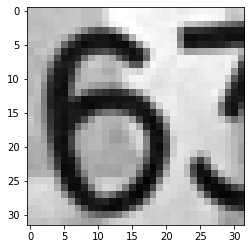

In [17]:
# Visualize a few images (first image in X_train)

import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(X_train[1,:,:],cmap='gray')

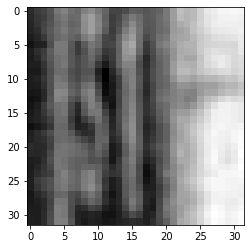

In [18]:
# Visualize first image in X_test)

plt.imshow(X_test[0,:,:],cmap='gray')

6   7   4   4   0   3   0   7   3   1   
0   1   3   1   1   0   0   8   4   6   
5   7   9   1   0   3   0   7   2   1   
1   0   2   9   0   2   5   1   3   2   
7   9   8   4   9   4   5   9   3   4   
0   5   5   8   3   6   6   0   0   6   
8   8   3   1   4   7   0   2   9   4   
8   7   3   9   4   4   3   3   4   4   
8   6   8   7   4   0   4   4   4   1   
4   2   7   4   2   9   1   9   1   0   


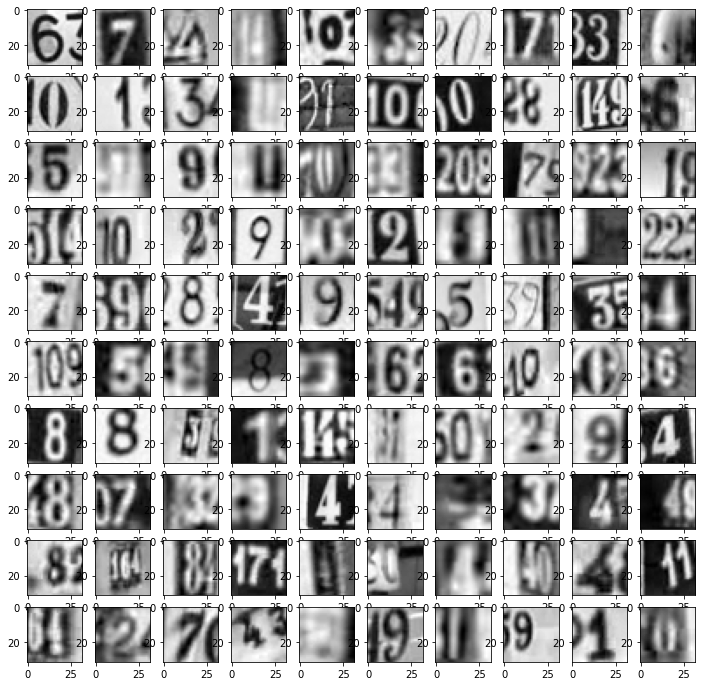

In [19]:
# Import Visualization/Plotting Library and Visualize the SVHN Dataset images

import matplotlib.pyplot as plt
%matplotlib inline

columns=10
rows=10

fig=plt.figure(figsize=(12, 12))

for i in range(1,columns*rows+1):
  img=X_train[i]
  fig.add_subplot(rows,columns,i)
  print(y_train[i],end='   ')
  if i % columns == 0:
    print ("")
  plt.imshow(img,cmap='gray')

plt.show()

### 3. After pre-processing the data as mentioned in the pre-processing notebook, define a function that returns a tf.keras sequential neural network model. Call the function to initiate the model. – 20 marks

In [20]:
# 3.1. Check No. of Classes in the dataset for y_train

L=pd.DataFrame(y_train)
L[0].value_counts()

3    4281
5    4232
2    4197
9    4196
7    4192
8    4188
4    4188
0    4186
1    4172
6    4168
Name: 0, dtype: int64

Reshape the features from 32×32 into a single dimensional array of 1024 features in total.

X_train = X_train.reshape(42000, 1024) 

X_val = X_val.reshape(18000, 1024) 

Normalize the data from 0-255 to 0-1 by dividing the inputs by 255. The denominator should be a float, else the output would become 0. 

X_train = X_train / 255.0 

X_val = X_val / 255.0



In [21]:
# 3.2. Process and transform the Train & Test dataset images into an array suitable for #tensorflow backend.
# Input for a DNN cannot be a 32x32 image, but rather a vector (with one single row of columns). 
# Use the 'Reshape' command to convert the 32x32 images/pictures into an array of 1024 elements (i.e. 32x32=1024)

XX_train=X_train.reshape(X_train.shape[0],1024).astype('float32')
XX_test=X_test.reshape(X_test.shape[0],1024).astype('float32')
XX_val=X_val.reshape(X_val.shape[0],1024).astype('float32')

In [22]:
XX_train.shape

(42000, 1024)

In [23]:
XX_val.shape

(60000, 1024)

In [24]:
XX_test.shape

(18000, 1024)

In [25]:
# 3.3. Check and print the shape of the reshaped data (Train, Test & Validation)

print("XX_train shape:", XX_train.shape)
print("XX_test shape:", XX_test.shape)
print("XX_val shape:", XX_val.shape)

XX_train shape: (42000, 1024)
XX_test shape: (18000, 1024)
XX_val shape: (60000, 1024)


In [26]:
# Normalize the data from 0-255 to 0-1 by dividing the data inputs by 255. The denominator should be a float, else the output would become 0
# 3.4. Normalizing data from pixel images 0-255 to 0-1, resultant denominator being a float number between 0 and 1, else the output will become 0.
# This minimizes the vanishing gradient problem found in DNN, by converting data into a 0-to-1 scale.

In [27]:
XX_train/255

array([[0.12968785, 0.11866706, 0.10530196, ..., 0.19477727, 0.19942354,
        0.20799099],
       [0.34101608, 0.3414451 , 0.34656274, ..., 0.29498273, 0.30054745,
        0.31092745],
       [0.48284313, 0.49356118, 0.47872823, ..., 0.36837214, 0.41093138,
        0.44637334],
       ...,
       [0.6042902 , 0.61100274, 0.6149663 , ..., 0.52993256, 0.53592   ,
        0.5398412 ],
       [0.8137075 , 0.8176286 , 0.8353796 , ..., 0.83974785, 0.8319055 ,
        0.820142  ],
       [0.37285647, 0.37677765, 0.39246237, ..., 0.5414914 , 0.5509529 ,
        0.5509529 ]], dtype=float32)

In [28]:
XX_val/255

array([[0.17372157, 0.18039177, 0.20129648, ..., 0.0840902 , 0.08164353,
        0.07874981],
       [0.2595059 , 0.25991058, 0.26496157, ..., 0.27973488, 0.37018237,
        0.44869727],
       [0.4323859 , 0.41972825, 0.41143882, ..., 0.40005568, 0.3922133 ,
        0.38829216],
       ...,
       [0.16611569, 0.1610647 , 0.16130039, ..., 0.13170119, 0.13796666,
        0.13796666],
       [0.850962  , 0.84704083, 0.83527726, ..., 0.7012145 , 0.7012145 ,
        0.689898  ],
       [0.45171645, 0.44779527, 0.45171645, ..., 0.45866472, 0.46258587,
        0.46371567]], dtype=float32)

In [29]:
XX_test/255

array([[0.15905097, 0.18349686, 0.19206432, ..., 0.43143883, 0.4360851 ,
        0.44780627],
       [0.45161137, 0.44769022, 0.44376904, ..., 0.1652502 , 0.18922432,
        0.20883021],
       [0.52256864, 0.52834475, 0.53456783, ..., 0.50266707, 0.5012169 ,
        0.5027937 ],
       ...,
       [0.6517247 , 0.64594865, 0.6385533 , ..., 0.6388313 , 0.6383843 ,
        0.63793725],
       [0.5395208 , 0.5360466 , 0.5286514 , ..., 0.56779647, 0.5599541 ,
        0.55603296],
       [0.11836078, 0.11836078, 0.11836078, ..., 0.13760431, 0.1359851 ,
        0.13368313]], dtype=float32)

In [30]:
# 3.5. Converting the Y-variables into Categorical one-hot coded variables (one-hot encoding), NECESSAR & MANDATORY step for multi-class classification ( With more >1 neuron in the output layer).

from tensorflow import keras

yy_train = keras.utils.to_categorical(y_train, 10)
yy_test = keras.utils.to_categorical(y_test, 10)
yy_val = keras.utils.to_categorical(y_val, 10)

### 4. Declare the hyper parameters and fit the model. Evaluate the model and provide a summary of the model. – 20 marks

In [31]:
# Constructing of the Dense Neural Network (DNN) Model, using the Sequential API (by Initializing the model constructor)

model = Sequential()

In [32]:
# Define the DNN model architecture, by adding DNN Model Input Layers

model.add(Dense(1024, activation='relu'))   # All neurons in the Input layer, Input dataframe has 32x32=1024 columns or values for the x-axis
model.add(Dense(100, activation ='relu'))  # Use only 2000 sample from train & test daa set
model.add(Dense(10, activation='softmax'))  # Output layer with >1 neurons, using a Softmax function

In [33]:
# Compile the model, and convert it into an ANN object. Define type of loss function to add to the model.
# For a classification model, use 'categorical_crossentropy' or 'binary_crossentropy' etc for loss function hyper-parameter [Not MSSE method here]
# Minimize loss function when start with random weights ( i.e. reach point of least error), use the optimizer function with algorithm ='adam'. Drives towards absolute minima of error function
# Assess accuracy score metric
# Run code to complie and convert model into a runnable file

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [34]:
# Fit Model, after complilation into an object 
# Forward propagation and backward propagition cycles happen.
# Epochs = 10, read 10 times, with fine tunning of the weights with less errors & higher accuracy, per read + process f each batch/block
# Batch_size= 256, to manage the data size read into the memory. [Training dataset=42,000 records, Test dataset=18,000 & Val dataset=60,000 records and each of 1024 elements]
# Choose smaller batch/block size, to enable fast and efficient read into memory and processing. On each run (Foward+Back propagation), Weights are fine-tunned, optimised & adjusted for each batch run.
# Subsequect batches/blocks learn and fine-tune from previous ones, and at the last batch/block, the weights will have been optimized. 
# Multiple runs required through the blocks & dataset to understand patterns of the entire complex dataset for images like for SVHN, hence the epochs (multiple loops).
# Set Verbose = 1, to show display of log output on the screen. Verbose=0 does not display info.

model.fit(XX_train, yy_train, epochs=10, batch_size=256, verbose=1) 

Epoch 1/10
165/165 [==============================] - 0s 3ms/step - loss: 41.7348 - accuracy: 0.1015
Epoch 2/10
165/165 [==============================] - 0s 3ms/step - loss: 2.3026 - accuracy: 0.1019
Epoch 3/10
165/165 [==============================] - 0s 3ms/step - loss: 2.3026 - accuracy: 0.1019
Epoch 4/10
165/165 [==============================] - 0s 3ms/step - loss: 2.3026 - accuracy: 0.1019
Epoch 5/10
165/165 [==============================] - 0s 3ms/step - loss: 2.3026 - accuracy: 0.1019
Epoch 6/10
165/165 [==============================] - 0s 3ms/step - loss: 2.3026 - accuracy: 0.1019
Epoch 7/10
165/165 [==============================] - 0s 3ms/step - loss: 2.3026 - accuracy: 0.1019
Epoch 8/10
165/165 [==============================] - 0s 3ms/step - loss: 2.3026 - accuracy: 0.1019
Epoch 9/10
165/165 [==============================] - 0s 3ms/step - loss: 2.3026 - accuracy: 0.1019
Epoch 10/10
165/165 [==============================] - 0s 3ms/step - loss: 2.3026 - accuracy: 0.101

Observation: 
1. The loss of the model has reduced significantly after the first run, and less so over the next 9 epoch runs, while
2. The accuracy also improved in the first three runs (epochs) and less so after the 3rd run, in the seven runs after that.

In [36]:
# Do an evaluation of the model on the Test set

loss, acc = model.evaluate(XX_test, yy_test, verbose=0)
print('Accuracy: %.3f'  % acc)
print('Loss: %.3f' % loss)

Accuracy: 0.095
Loss: 2.303


Observation : While the loss in the test dataset is similar to the one in the training dataset (at 2.303) , the accuracy for the model in the Test dataset has reduced from 10.19% to less at 9.6%. 

In [37]:
type(model)

tensorflow.python.keras.engine.sequential.Sequential

In [38]:
# Model Review 
# Summary of model using model.summary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              1049600   
_________________________________________________________________
dense_1 (Dense)              (None, 100)               102500    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 1,153,110
Trainable params: 1,153,110
Non-trainable params: 0
_________________________________________________________________


#### Observation : Model has 3 layers, 10 outputs and 1,153,110 parameters
